## Question 1.

### (a)

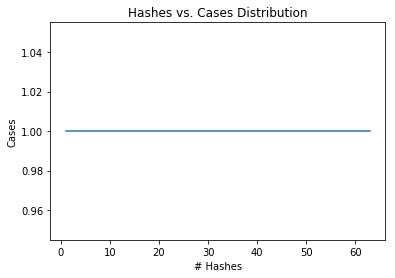

In [49]:
%matplotlib inline
import operator as op
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats


def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, xrange(n, n-r, -1), 1)
    denom = reduce(op.mul, xrange(1, r+1), 1)
    return numer // denom


def factorial(n):
    return reduce(lambda x, y: x * y, [1] + range(1, n+1))


def limit(m, k):
    return pow(2, k) * m


def f(m, k, upper_bound, n):
    if n is 0:
        return 1
    if n < 0:
        return 0
    
    c = 0
    i = 0
    
    while (upper_bound + 1) * i <= n:
        j = n - (upper_bound + 1) * i
        c += pow(-1, i) * ncr(m, i) * ncr((j+m)-1, j)
        i += 1
    
    return c

m_1 = 1
k_1 = 6
m_2 = 8
k_2 = 3

data = {
    'Hashes#': [x for x in range(1, limit(m_1, k_1))],
    'Puzzle A': [1 for _ in range(1, 64)],
#     'Puzzle B': [ f(m_2, k_2, pow(2, k_2) - 1, x - m_2) for x in range(1, limit(m_2, k_2))],
}

df_1 = pd.DataFrame(data)

# plt.figure()
plt.plot('Hashes#', 'Puzzle A', data=df_1)
# plt.plot('Hashes#', 'Puzzle B', data=df_1)


plt.xlabel('# Hashes')
plt.ylabel('Cases')
plt.title('Hashes vs. Cases Distribution')

plt.show()

### (b)

### (c)

### (d)

In [46]:
print("Puzzle A")
print('median: ' + str(df_1['Puzzle A'].median()))
print(df_1['Puzzle A'].describe())
print("\nPuzzle B")


Puzzle A
median: 1.0
count    63.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Puzzle A, dtype: float64

Puzzle B


## Question 2.

The original code shown only checks if the user is not granted access before stopping them from calling the function or performing the action. This breaks the "default deny, not default allow" principle of general secure coding. To fix this, the following pseudocode should be applied:

```pseudocode
permit = CheckAccess()
IF (permit == Access_Granted)
    Print "Access Granted"
    Run Function()
ELSE
    Print "Access Denied"
```

## Question 3.   

Consider that the <em>incidence</em> of viral attachments in email messages is <b>1 in 800</b>. Your malware checker will correctly identify a message as <em>viral</em> <b>95%</b> of the time. Your malware checker will correctly identify a message <em>non-viral</em> <b>95%</b> of the time. Your malware checker has just flagged a message as being <em>malware</em>. What is the probability that the message is <b>actually okay</b>? Justify your answer using <b>Bayes theorem</b>

$$
\begin{align*}
& P(A|B) = \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|\bar{A})P(\bar{A})} \\ \\
& P = \frac{0.05 \times \frac{799}{800}}{(0.05 \times \frac{799}{800}) + (0.95 \times \frac{1}{800})} \\ \\
\therefore ~ & P = 80.6
\end{align*}
$$

## Question 4.  

Describe, in your own words, a <b>specific instance of an insider placing malware within a system.</b> You should describe the <b>type of malware placed</b>, <b>the expected likely impact</b>, and <b>some details regarding the outcome</b>. This is not meaning a hypothetical scenario you have made up, find an actual real world example.

Stuxnet, a worm malware first categorised by security researchers in July 2010, but was speculated to have been in use and in the wild since June 2009, is one of the most sophisticated and advanced digital cyber threats ever made [1]. Stuxnet has been dubbed by experts as the first malware to have been developed that can cause physical damage. Reverse engineering of the code has also shown it to be the first malware to exploit 3 zero-day vulnerabilities in Window systems and another vulnerability with Simatic WinCC Step7 software database default password [2]. The first version of the worm was discovered to be computer code used as a beacon to send configuration information back to two command and control servers at www.mypremierfutbol.com and www.todaysfutbol.com [3], [1]. Multiple versions of the worm has been discovered since, with some researchers confirming at least 3 to have been used. 

In 2010, while studying the Stuxnet worm, researchers at Symantec in [6] mapped out the worldwide propagation of the virus. This included the following:

**Percentage of Hits from W32.Stuxnet by Country**

| Country    | Percentage (%) |
|------------|----------------|
| Iran       | 58.85          |
| Indonesia  | 18.22          |
| India      | 8.31           |
| Azerbaijan | 2.57           |
| USA        | 1.56           | 
| Pakistan   | 1.28           |
| Others     | 9.20           |
[6]

Due to the high incidence rate in Iran, and through other mappings of source of infections targeted specifically at 5 companies in Iran, the researchers discovered Stuxnet was targeted specifically at the Natanz nuclear facility. Specifically, the malware was designed in such a way as to only infect Siemens industrial control systems known as SCADA and Windows systems running the Step7 software. Once infected, the Windows systems from software engineers would unknowingly upload the malicious code to the Programmable Logic Controller which was a system that controlled motors, valves, switches, including those responsible for spinning centrifuges at he Natanz facility. This specific function of the malware, in addition to its configurations to look for centrifgures that spun at a specific rate, was evidence of its direct attack for this facility.

Stuxnet was able to propogate via USB and local area networks by exploiting four zero-day vulnerabilities at the time. These included:
* Microsoft Windows Shortcut 'LNK/PIF' Files Automatic Execution Vulnerability (BID 41732) to infect systems via a USB [6];
* Microsoft Windows Print Spooler Service Remote Code Execution Vulnerability (BID 43073) to copy itself from a compromised system to another [6];
* Microsoft Windows Server Service RPC Handling Remote Code Execution Vulnerability (BID 31874) to elevate priviledges and code execution [6]; and
* Hard coded default administrator password in the Step7 database.

Stuxnet was a worm that had both usermode and kernel-level rootkit capabilities hidden in the system memory rather than hard disk [6]. It was able to hide its malicious code due to its drivers being signed by stolen certificates from RealTek Semiconductors and JMicron Semiconductors, both companies from Taiwan. Because of its peer-to-peer RPC exploit, it also did not require the internet to propagate. Researchers believed the malware was contained by checking if the Windows systems had the Step7 software installed. However, due to a programming error in 2010, it is believed by some the virus got out into the public via the internet and was later discovered in 2010 by a Belurusian company [3].

Stuxnet was configured in such a way that engineers who were infected on their Windows systems, would then plug their device into the PLCs at Natanz and malicious code was injected into code uploaded to control the system. Stuxnet was able to avoid warning systems by intercepting warning reports and replacing them with normal operating values. The code was designed to work in a slow manner which either sped up the physical centrifuges or slow them down in short burts before becoming dormant for 27 days. This type of malware affected the integrity, confidentiality, and availability of the nuclear enrichment apparatus at the Natanz facility. It has been shown to cause no harm to any other type of system. 

Attribution for the creators of Stuxnet has largely been speculation amongst security experts, politcal entities, and journalists. However, researchers and journalists over the years have found evidence to suggests that Isreali intelligence and the United States could both be nation-state sponsors in the development of the malware [1], [3], [4], [5], [7]. Both nations have denied this fact. 

Outcomes and reports of the damage achieved by Stuxnet has also been largely unknown and conjecture. Some estimates believe Stuxnet was able to destroy 1000-2000 centrifuges at the Natanz facility [1], [3]. Some anonymous insiders from the US intelligence agencies and Obama administration have also suggested the attack set back the Iranian progress toward nuclear weapons by 18 months to two years. 

#### References:  

[1]  K. Zetter, "How Digital Detectives Deciphered Stuxnet, The Most Menacing Malware in History," *wired.com,* Jul. 07, 2011. [Online] Available: https://www.wired.com/2011/07/how-digital-detectives-deciphered-stuxnet/. [Accessed: Sep. 21, 2018].  

[2]  R. Naraine, "Stuxnet attackers used 4 Windows zero-day exploits," *zdnet.com*, Sep. 24, 2010. [Online]. Available: https://www.zdnet.com/article/stuxnet-attackers-used-4-windows-zero-day-exploits/. [Accessed: Sep. 21, 2018].  

[3]  D. Sanger, "Obama Order Sped Up Wave of Cyberattacks Against Iran," *nytimes.com*, Jun. 1, 2012. [Online]. Available: https://www.nytimes.com/2012/06/01/world/middleeast/obama-ordered-wave-of-cyberattacks-against-iran.html?pagewanted=1&_r=1&hp. [Accessed: Sep. 22, 2018].  

[4]  D. Kushner, "The Real Story of Stuxnet," *IEEE Spectrum,* Feb. 26, 2013. [Online]. Available: https://spectrum.ieee.org/telecom/security/the-real-story-of-stuxnet. [Accessed: Sep. 21, 2018].  

[5]  J. Fruhlinger, "What is Stuxnet, who created it and how does it work?" *csoonline.com*, Aug. 22, 2017. [Online]. Available: https://www.csoonline.com/article/3218104/malware/what-is-stuxnet-who-created-it-and-how-does-it-work.html. [Accessed: Sep. 21, 2018]  

[6]  J. Shearer, "W32.Stuxnet Writeup," *Symantec Enterprise,* Security Center, Sep. 26, 2017. [Online]. Available: https://www.symantec.com/security-center/writeup/2010-071400-3123-99. [Accessed: Sep. 21, 2018].  

[7]   R. Lagner, "Cracking Stuxnet, a 21st-century cyber weapon," *TEDx Talk*, Mar. 2011. [Video file]. Available: https://www.ted.com/talks/ralph_langner_cracking_stuxnet_a_21st_century_cyberweapon. [Accessed: Sep. 22, 2018].

## Question 5.  

In relation to detecting phishing attempts, the following are points to consider when checking the legitimacy of an email:

1. Anti-spam filtering software  
    
    The use of anti-spam filtering software, as phishing emails are considered spam, at the desktop level or at the gateway level (by ISPs and email service providers) is considered one of the best ways to stop phishing attempts before the user can be affected. Emails that have been tagged as spam can be considered suspicious immediately by users so they may want to consider other points before trusting the email. Whilst spam filtering is not perfect, many solutions, including those using machine learning algorithms, have been shown to be extremely effective. Users should consider their choice of email providers based on whether there is an effective spam-filtering service. 
    
    
2. Identifying sender email address and return path in email header
    
    Often phishing emails use imitations of legitimate business domains with minor alterations. If you are familiar or have received many previous legitimate emails from that institution, it is prudent to check the the email from address and return path is the same as those seen before. It is important to make sure you are checking the email header rather than the 'from' address in the email application viewer as this can be altered. It is also important to make sure the return path address and sender address are the same.  
    
    
3. Check any domain and URL link sent in email body for spelling errors
    
    Before clicking on any links, it is important to check any link for spelling or obvious domain errors. In particular, embedded links (such as those attached to images) should be checked before clicking. You can do so by copying the link to another text file to check the spelling. Often with phishing emails, the url shown in the email is different from the url in any embedded or obvious links.   
    
    
4. Type desired web address into browser instead of clicking on embedded links

    As an additional to point 3, instead of clicking on links, it is preferable to type the url address into the browser url field rather than clicking the links. This will again allow the user to check for any obvious spelling errors or imitations of legitimate business domains. Carrying out this might be cumbersome but it may be necessary to be sure the domain or web address is legitimate.  
    

5. Confirm the apparent sending institution is a legitimate provider of service

    An email is very suspicious if it is sent from a business that the user is not a customer of or has never done any business with. Additionally, some businesses only operate overseas and do not generally offer their services in the country of the user (e.g. banking services overseas). Any email from such a business should be considered suspicious. 
    

6. Check for any obvious spelling or grammatical errors in the email subject line or body content  
    
    Often phishing email content is badly written. The user needs to check for any obvious spelling or grammatical errors as sometimes these emails are translated from another language which may not be compatible with the user's language. Another important consideration should be checking the spelling of the business or institution as businesses do not often spell their names wrong and phishing emails have been shown to make this mistake, particularly if it is translated from another language. 
    
    
7. Call the apparent sending institution to verify authenticity  

    If the user is unsure or suspicious of the email, it is important the user calls the institution from which the email was sent. Another important consideration to make sure the user uses the phone numbers available from legitimate websites or letters. A quick phone call can easily clear up any issues of phishing.
    

8. Check whether the website is using the HTTPS protocol and check the SSL certificate is legitimate
    
    After going to any links, the user can check the browser url bar to see if the website is using a secure protocol. Often, phishing attackers do not take the time to use the secure HTTPS protocol for secure transmission of data. Additionally, the user can check the SSL certificate from in the browser to make sure the website has been verified by a certificate provider. Often, scammers and phishing attackers cannot get a proper certificate for a legitimate business. As an additional precaution, users can install plugins like HTTPS Everywhere, which checks to make sure the website the user is visiting is definitely using HTTPS. 


**References:** 

[1]  G. Tally, R. Thomas, & T. Van Vleck, "Anti-Phishing: Best Practices for Institutions and Consumers," *McAfee*, Sep. 2004. [Online]. Available: https://docs.apwg.org/sponsors_technical_papers/Anti-Phishing_Best_Practices_for_Institutions_Consumer0904.pdf [Accessed: Sep, 23, 2018].

[2]  W. Zamora, "Something’s phishy: How to detect phishing attempts," *Malwarebytes Labs*, Jun. 26, 2017. [Online]. Available: https://blog.malwarebytes.com/101/2017/06/somethings-phishy-how-to-detect-phishing-attempts/ [Accessed: Sep. 23, 2018].

[3]  Anti-Phishing Working Group, "How to Avoid Phishing Scams," *Anti-Phishing Working Group*. [Online]. Available: https://apwg.org/resources/overview/avoid-phishing-scams [Accessed: Sep. 23, 2018]

## Question 6.  

### (a)

In [2]:
import pandas as pd
from IPython.display import display

n_x = 1  # number of X infected computers at t = 0

table = {'t': [i for i in range(0, 25)],
         'x': [2 ** j for j in range(0, 25)]}

df_1 = pd.DataFrame(table)
display(df_1)

,t,x
0,0,1
1,1,2
2,2,4
3,3,8
4,4,16
5,5,32
6,6,64
7,7,128
8,8,256
9,9,512


### (b)

In [3]:
import numpy as np

n_x = 0  # number of x infected computers at t = 0
n_w = 0  # number of w infected computers
idx = 0

# initialise variable
table = {'t': [t for t in np.arange(0, 24.5, 0.5)],
         'x_inf': [0 for _ in np.arange(0, 24.5, 0.5)],
         'w_inf': [0 for _ in np.arange(0, 24.5, 0.5)]}


for i in table['t']:
    idx = int(i * 2)

    if i == np.float(0):
        n_x = 1
        table['x_inf'][0] = n_x
    elif i == np.float(0.5):
        table['x_inf'][1] = n_x

    if i >= np.float(1.0):

        if i % 1 == 0:  # on every hour
            n_x *= 2
            table['w_inf'][idx] = n_w if i > np.float(6.5) else 0  # maintain w at hour mark
            table['x_inf'][idx] = n_x

        elif i % 1 == 0.5:  # on every half hour
            if i == np.float(6.5):  # at t = 6.5, introduce w
                n_w = 1
                table['w_inf'][idx] = n_w
                n_x = n_x - n_w
                table['x_inf'][idx] = n_x

            if i > np.float(6.5):  # after introduction of w
                n_w *= 3
                if n_w > n_x:
                    n_w = int((n_w / 3) + n_x)

                n_x = int(n_x - (n_w - (n_w / 3))) if n_w < n_x and n_x > 0 else 0
                table['w_inf'][idx] = n_w
            table['x_inf'][idx] = n_x

df_2 = pd.DataFrame(table)
df_2.columns = ['t', 'x', 'w']
display(df_2)

,t,x,w
0,0.0,1,0
1,0.5,1,0
2,1.0,2,0
3,1.5,2,0
4,2.0,4,0
5,2.5,4,0
6,3.0,8,0
7,3.5,8,0
8,4.0,16,0
9,4.5,16,0


### (c)

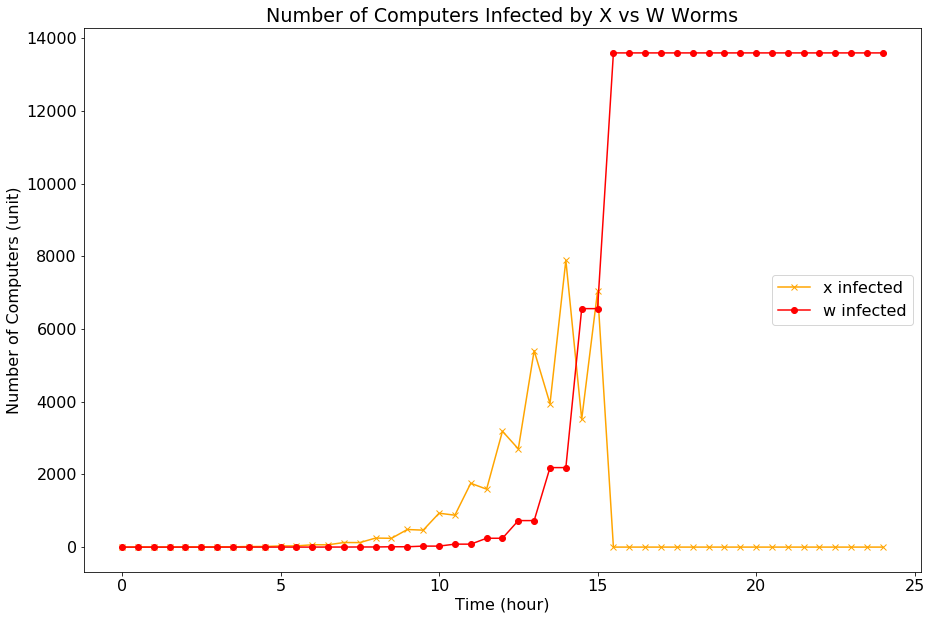

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

df_2.columns = ['t', 'x_inf', 'w_inf']

# plot graph
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 16})

plt.plot('t', 'x_inf', data=df_2, color='orange', marker='x', label='x infected')
plt.plot('t', 'w_inf', data=df_2, color='red', marker='o', label='w infected')
plt.xlabel("Time (hour)")
plt.ylabel("Number of Computers (unit)")
plt.title("Number of Computers Infected by X vs W Worms")
plt.legend(loc=5)
plt.show()

### (d)

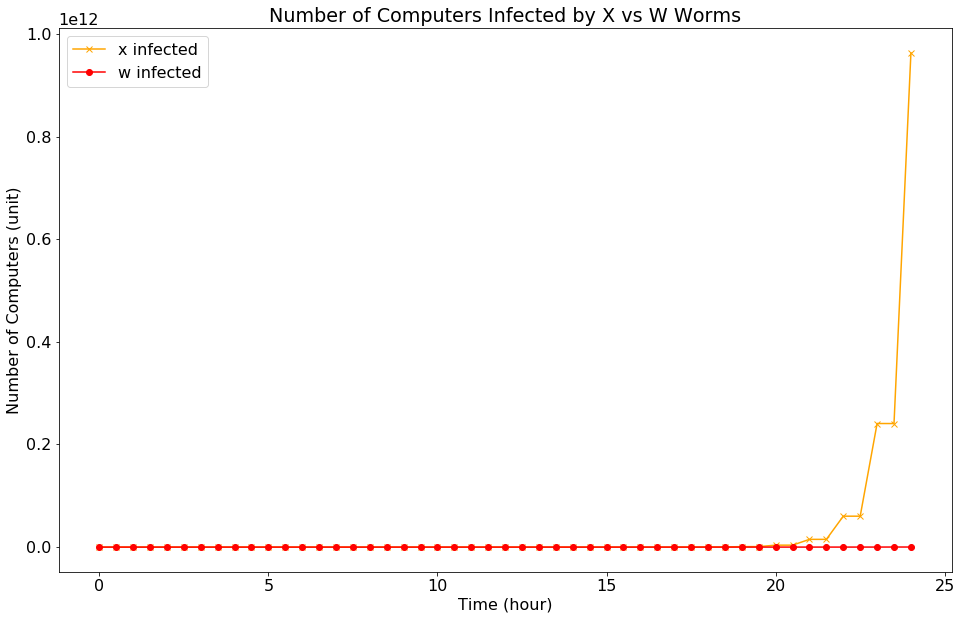

In [11]:
for i in table['t']:
    idx = int(i * 2)

    if i == np.float(0):
        n_x = 1
        table['x_inf'][0] = n_x
    elif i == np.float(0.5):
        table['x_inf'][1] = n_x

    if i >= np.float(1.0):

        if i % 1 == 0:  # on every hour
            n_x *= 2 if i < np.float(9.0) else 4  # at t = 9, x evolves to spread to three uninfected computers each hour
            table['w_inf'][idx] = n_w if i > np.float(6.5) else 0  # maintain w at hour mark
            table['x_inf'][idx] = n_x

        elif i % 1 == 0.5:  # on every half hour
            if i == np.float(6.5):  # at t = 6.5, introduce w
                n_w = 1
                table['w_inf'][idx] = n_w
                n_x = n_x - n_w
                table['x_inf'][idx] = n_x

            if i > np.float(6.5):  # after introduction of w
                n_w *= 3
                if n_w > n_x:
                    n_w = int((n_w / 3) + n_x)

                n_x = int(n_x - (n_w - (n_w / 3))) if n_w < n_x and n_x > 0 else 0
                table['w_inf'][idx] = n_w
            table['x_inf'][idx] = n_x

df_3 = pd.DataFrame(table)
df_3.columns = ['t', 'x', 'w']
# display(df_3)

df_3.columns = ['t', 'x_inf', 'w_inf']

# plot graph
plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 16})

plt.plot('t', 'x_inf', data=df_3, color='orange', marker='x', label='x infected')
plt.plot('t', 'w_inf', data=df_3, color='red', marker='o', label='w infected')
plt.xlabel("Time (hour)")
plt.ylabel("Number of Computers (unit)")
plt.title("Number of Computers Infected by X vs W Worms")
plt.legend(loc=0)
plt.show()

At t = 9, X has already substantially infected 484 computers and W has only infected 9 computers. After this point, if X now propagates at the a rate more than W, then there is no stopping X from continuing to infect computers till infinity. Also, because X has infected 484 computers, it will now propogate at a steeper rate than W. 

## Question 7. 

#### XML Bomb  

A form of Denial-of-Service attack that impacts the availability of a website. XML, eXtensible Markup Language, is a markup language that was designed and is popular for storing and transferring structured data [1]. Data files can be checked by a parsing library before being processed. XML schemas and Document Type Definitions (DTDs) files are used to then validate and compare rules for the type of data that appears in the XML file. Inline DTDs can be abused when the parsing library is not configured properly, causing what is known as an XML bomb or Entity Expansion XML bomb [2]. A famous XML bomb example includes the "Billions Laugh Effect." This type of attack can list entity definitions in an XML file that is heavily nested, leading to parsing that can lead to extremly large files. The large size of these parsed XML files can cause a server to crash.


#### BlueSmack  

A form of Denial-of-Service attack that specifically targets Bluetooth-enabled devices and the Bluetooth protocol. It is a similar technique to the 'Ping of Death' attack of Windows 95, where a l2ping data packet (roughly 600 bytes) is transmitted to a Bluetooth device bigger than the maximum packet size [3], [4]. This causes the device to become unusable, and can also affect the device by draining its battery [4]. The l2ping packet is part of the standard distribution of the BlueZ utility package that ships with Linux [3]. 


#### Mydoom  

Mydoom (aka W32.MyDoom@mm) is a variant of computer worm that was spread via email which affected Microsoft Windows systems discovered in 2004. It infected systems by copying itself to P2P KaZaA client shared directories and its payload contained a backdoor Remote Access component on TCP port 3127 [5]. From here, the worm was able to extract email addresses from the system and then use SMTP methods to send itself as an attachment from the host email server [5]. The original variant of Mydoom is the fastest growing spam email worm known so far and has also been shown to avoid sending itself to certain domain addresses such as Rutgers, MIT, Stanford, UC Berkeley, Microsoft and Symantec [6]. Other variants of the worm were later designed to use infected hosts as zombies in a Distributed Denial-of-Service attack directed at the SCO Group and Microsoft [6]. 


#### Torpig   

Torpig is a botnet that affects Windows systems. It infects users by modifying legitimate websites as a Trojan-horse and using a drive-by-download server to install the Mebroot rootkit [7]. The Mebroot rootkit replaces the Master Boot Record (MBR) of the infected system which then loads the rootkit upon reboot of the system. The malware communicates with a Command and Control (C&C) server via HTTP with an encrypted mechanism which allows it to update its modules. Infected computers become part of the botnet. Torpig is a form of spyware that affects the integrity and confidentiality of systems by inspecting data from affected programs (i.e. Service Control Managers, email clients, the file manager, and other programs) to steal its credentials for online accounts and passwords. 



**References:**

[1]   w3schools, "Introduction to XML," *w3schools.com*. [Online]. Available: https://www.w3schools.com/xml/xml_whatis.asp [Accessed: Sep. 23, 2018].

[2]   D. Jovanoski, "XML vulnerabilities," May 6, 2013. [Online]. Available: https://resources.infosecinstitute.com/xml-vulnerabilities/ [Accessed: Sep. 23, 2018]. 

[3]   trinite.suff, "BlueSmack," *tifinite.org*. [Online] Available: https://trifinite.org/trifinite_stuff_bluesmack.html [Accessed: Sep. 23, 2018]

[4]   S.P. Oriyano, *Kali Linux Wireless Penetration Testing Cookbook*. Birmingham: Packt Publishing, 2017. 

[5]   McAfee, "Virus Profile: W32/Mydoom@MM," *McAfee*, Jan. 02, 2004. [Online]. Available: https://home.mcafee.com/virusinfo/virusprofile.aspx?key=100983 [Accessed: Sep. 23, 2018].  

[6]   Newsweek Staff, "More Doom?" *Newsweek*, Feb. 2, 2004. [Online]. Available: https://www.newsweek.com/more-doom-131157 [Accessed: Sep. 23, 2018].

[7]   B. Stone-Gross, M. Cova, B. Gilbert, R. Kemmerer, C. Kruegel, and G. Vigna, "Analysis of a Botnet Takeover,' *IEEE Security & Privacy*, vol. 9, no. 1, Jan.-Feb, pp. 64-72, 2010. Available: IEEE Xplore Digital Library, https://ieeexplore.ieee.org/document/5560627/. [Accessed September 23, 2018].

[8]   Carnegie Mellon University, "Torpig," *web.archive.org*, May 19, 2015. [Online]. Available: https://web.archive.org/web/20150519174934/http://www.cmu.edu/iso/aware/be-aware/torpig.html [Accessed: Sep. 23, 2018].

[9]   R. Naraine, "Botnet hijack: Inside the Torpig malware operation," *zdnet.com*, May 4, 2009. [Online] Available: https://www.zdnet.com/article/botnet-hijack-inside-the-torpig-malware-operation/ [Accessed: Sep. 23, 2018].

## Question 8.  

A Browser Helper Object (BHO) is a plugin that is used in Microsoft's Internet Explorer (IE) that added additional functionality, such as a toolbar, to the browsers Document Object Model (DOM) [2]. The objects are commonly DLL, DAT, or EXE files that are installed mistakenly by users or often as part of bundled software. 

It is for its designed and intended purpose that BHOs were used maliciously in an attack commonly called Browser Hijack Objects, which is a form of adware. This attack affects the integrity and availability of the system [1]. In this malicious infection, the plugin that is installed is often used to provide advertisements in a toolbar that can provide financial incentives for the attacker when clicked on. Through the use of BHOs, the attacker can automate the the clicks for financial gain every time a victim uses their browser. 

**References:**

[1]   W. Stallings, *Computer Security: Principles and Practice, Global Edition,  4th Edition*, New York, NY: Pearson, 2018. [VitalSource Bookshelf version]. Available: https://www.vitalsource.com/en-uk/products/computer-security-principles-and-practice-global-william-stallings-v9781292220635. [Accessed: Sep. 23, 2018].


[2]   Malwarebytes Labs, "Browser Hijack Objects (BHOs)," *Malwarebytes Labs*, Jun. 9, 2016. [Online]. Available: https://blog.malwarebytes.com/threats/browser-hijack-objects-bhos/ [Accessed: Sep. 23, 2018]. 